In [27]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import MobileNetV2
from keras.preprocessing import image
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
training_data = train_datagen.flow_from_directory(
        'Data\Train',
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')
testing_data = train_datagen.flow_from_directory(
        'Data\Test',
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')

Found 1440 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [82]:
#adding early_stopping so my computer doens't waste time
early_stopping = EarlyStopping(monitor='val_loss', patience=11)

In [33]:
model = Sequential([Flatten(),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dropout(rate=0.5),
                    Dense(3, activation = 'softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs = 30,
                    verbose = 1,
                    callbacks= [early_stopping])

Epoch 1/30
45/45 [==============================] - 13s 292ms/step - loss: 0.5920 - accuracy: 0.7500 - val_loss: 0.5005 - val_accuracy: 0.8298
Epoch 2/30
45/45 [==============================] - 13s 288ms/step - loss: 0.4967 - accuracy: 0.7667 - val_loss: 0.5820 - val_accuracy: 0.7660
Epoch 3/30
45/45 [==============================] - 13s 288ms/step - loss: 0.4862 - accuracy: 0.7743 - val_loss: 0.5789 - val_accuracy: 0.7660
Epoch 4/30
45/45 [==============================] - 13s 288ms/step - loss: 0.5467 - accuracy: 0.7493 - val_loss: 0.6526 - val_accuracy: 0.7730
Epoch 5/30
45/45 [==============================] - 13s 288ms/step - loss: 0.4773 - accuracy: 0.7708 - val_loss: 0.4806 - val_accuracy: 0.8227
Epoch 6/30
45/45 [==============================] - 13s 288ms/step - loss: 0.4348 - accuracy: 0.8042 - val_loss: 0.7374 - val_accuracy: 0.8156
Epoch 7/30
45/45 [==============================] - 13s 288ms/step - loss: 0.4301 - accuracy: 0.8090 - val_loss: 0.4801 - val_accuracy: 0.8085

In [41]:
# great start lets add more layers

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, None)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               91447808  
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 3)                 771       
                                                                 
Total params: 91,579,907
Trainable params: 91,579,907
Non-trainable params: 0
_________________________________________________________________


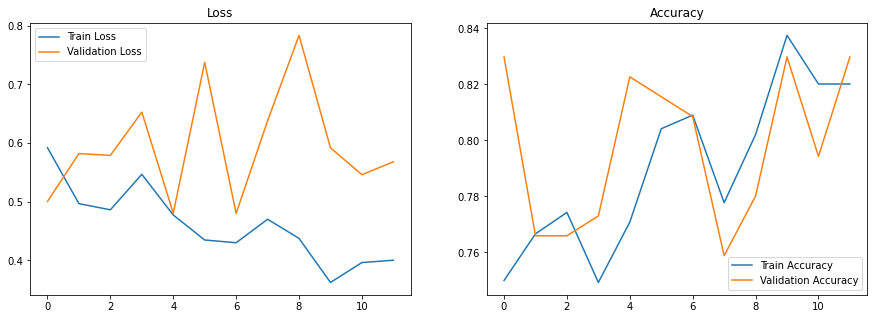

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [44]:
score = model.evaluate(testing_data)

5/5 [==============================] - 0s 67ms/step - loss: 0.5681 - accuracy: 0.8298


In [45]:
# great first model, lets see if diffirent layers do better

0.8297872543334961

In [52]:
model = Sequential([Conv2D(200, (3,3), activation='relu', input_shape=(244, 244, 3)),
                    MaxPool2D(5,5),
                    Conv2D(180, (3,3), activation='relu'),
                    MaxPool2D(5,5),
                    Flatten(),
                    Dense(180, activation='relu'),
                    Dropout(rate=0.5),
                    Dense(3, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs=30,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/30
45/45 [==============================] - 75s 2s/step - loss: 0.6086 - accuracy: 0.7618 - val_loss: 0.3051 - val_accuracy: 0.9149
Epoch 2/30
45/45 [==============================] - 74s 2s/step - loss: 0.4459 - accuracy: 0.8361 - val_loss: 0.3460 - val_accuracy: 0.9007
Epoch 3/30
45/45 [==============================] - 74s 2s/step - loss: 0.3567 - accuracy: 0.8722 - val_loss: 0.2419 - val_accuracy: 0.9078
Epoch 4/30
45/45 [==============================] - 73s 2s/step - loss: 0.3489 - accuracy: 0.8576 - val_loss: 0.2576 - val_accuracy: 0.9291
Epoch 5/30
45/45 [==============================] - 72s 2s/step - loss: 0.3017 - accuracy: 0.8896 - val_loss: 0.2222 - val_accuracy: 0.9504
Epoch 6/30
45/45 [==============================] - 73s 2s/step - loss: 0.2625 - accuracy: 0.9014 - val_loss: 0.2501 - val_accuracy: 0.9291
Epoch 7/30
45/45 [==============================] - 74s 2s/step - loss: 0.2860 - accuracy: 0.8903 - val_loss: 0.2645 - val_accuracy: 0.9149
Epoch 8/30
45/45 [==

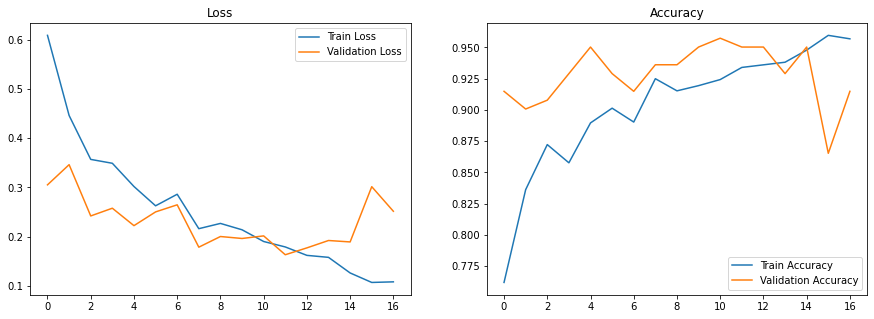

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [56]:
score = model.evaluate(testing_data)

5/5 [==============================] - 3s 455ms/step - loss: 0.3143 - accuracy: 0.9149


In [76]:
# cool, lets add image augmentation in and some more layers
# added a seed this time for consistency
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=90,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,
    vertical_flip=True)

training_data = train_datagen.flow_from_directory(
        'Data\Train',
        target_size=(244, 244),
        batch_size=32,
        seed=42,
        class_mode='categorical')
testing_data = train_datagen.flow_from_directory(
        'Data\Test',
        target_size=(244, 244),
        batch_size=32,
        seed=42,
        class_mode='categorical')

Found 1440 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [87]:
model = Sequential([Conv2D(200, (3,3), activation='LeakyReLU', input_shape=(244, 244, 3)),
                    MaxPool2D(2,2),
                    BatchNormalization(),
                    Conv2D(180, (3,3), activation='LeakyReLU'),
                    MaxPool2D(5,5),
                    Conv2D(128, (2,2), activation='LeakyReLU'),
                    MaxPool2D(3,3),
                    Dropout(rate=0.35),
                    Conv2D(64, (2,3), activation='LeakyReLU'),
                    MaxPool2D(3,3),
                    Flatten(),
                    Dense(250, activation='LeakyReLU'),
                    Dropout(rate=0.5),
                    Dense(180, activation='LeakyReLU'),
                    Dropout(rate=0.35),
                    Dense(128, activation='LeakyReLU'),
                    Dropout(rate=0.2),
                    Dense(3, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs=50,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/50
45/45 [==============================] - 178s 4s/step - loss: 0.8067 - accuracy: 0.6347 - val_loss: 0.5475 - val_accuracy: 0.7801
Epoch 2/50
45/45 [==============================] - 179s 4s/step - loss: 0.5399 - accuracy: 0.8125 - val_loss: 0.3247 - val_accuracy: 0.8936
Epoch 3/50
45/45 [==============================] - 182s 4s/step - loss: 0.4483 - accuracy: 0.8326 - val_loss: 0.4195 - val_accuracy: 0.8865
Epoch 4/50
45/45 [==============================] - 182s 4s/step - loss: 0.4306 - accuracy: 0.8340 - val_loss: 0.3372 - val_accuracy: 0.9007
Epoch 5/50
45/45 [==============================] - 181s 4s/step - loss: 0.4251 - accuracy: 0.8444 - val_loss: 0.2531 - val_accuracy: 0.9149
Epoch 6/50
45/45 [==============================] - 181s 4s/step - loss: 0.5059 - accuracy: 0.8104 - val_loss: 0.3385 - val_accuracy: 0.8936
Epoch 7/50
45/45 [==============================] - 183s 4s/step - loss: 0.4067 - accuracy: 0.8472 - val_loss: 0.2636 - val_accuracy: 0.9149
Epoch 8/50
45

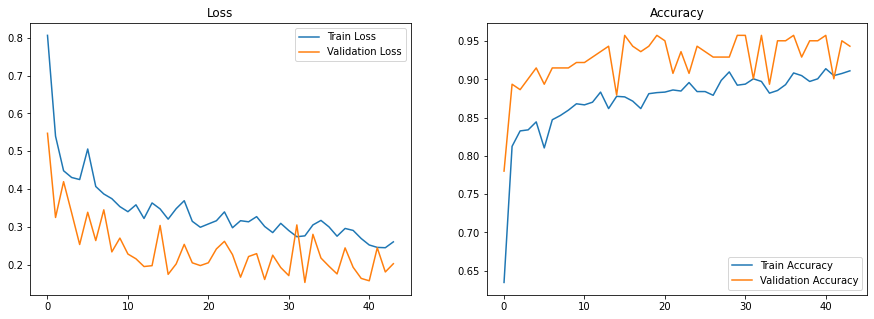

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [90]:
score = model.evaluate(testing_data)

5/5 [==============================] - 5s 828ms/step - loss: 0.1991 - accuracy: 0.9645
